In [1]:
import numpy as np
import pandas as pd
import nltk

In [62]:
pos_df = pd.read_csv('/content/drive/MyDrive/Netflix Sentiment/pos.txt', sep='\n', encoding='latin1', header=None)

In [63]:
pos_df.head()

,0
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."


In [64]:
pos_df['mood'] = 1

In [65]:
pos_df.rename(columns={0: 'review'}, inplace=True)

In [66]:
pos_df.head()

,review,mood
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [67]:
neg_df = pd.read_csv('/content/drive/MyDrive/Netflix Sentiment/negative.txt', sep='\n', encoding='latin1', header=None)

In [68]:
neg_df['mood'] = 0

In [69]:
neg_df.rename(columns={0: 'review'}, inplace=True)

In [70]:
neg_df.head()

,review,mood
0,"simplistic , silly and tedious.",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0


In [71]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
import string
import re
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

In [77]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [78]:
pos_df['review'] = pos_df['review'].apply(lambda x: x.lower())
# pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([lemma.lemmatize(word, pos='v') for word in x.split()]))
# pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))
pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([re.sub(r'[0-9\.]+', '', word) for word in x.split()]))

In [79]:
pos_df

,review,mood
0,the rock is destined to be the st century's ne...,1
1,the gorgeously elaborate continuation of the l...,1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,emerges as something rare an issue movie that'...,1
...,...,...
5326,both exuberantly romantic and serenely melanch...,1
5327,mazel tov to a film about a family's joyous li...,1
5328,standing in the shadows of motown is the best ...,1
5329,it's nice to see piscopo again after all these...,1


In [80]:
neg_df['review'] = neg_df['review'].apply(lambda x: x.lower())
# neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([lemma.lemmatize(word, pos='v') for word in x.split()]))
# neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))
neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([re.sub(r'[0-9\.]+', '', word) for word in x.split()]))

In [81]:
neg_df

,review,mood
0,simplistic silly and tedious,0
1,it's so laddish and juvenile only teenage boys...,0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0
...,...,...
5326,a terrible movie that some people will neverth...,0
5327,there are many definitions of 'time waster' bu...,0
5328,as it stands crocodile hunter has the hurried ...,0
5329,the thing looks like a made-for-home-video qui...,0


In [82]:
df = pd.concat([pos_df, neg_df], axis=0,).reset_index(drop=True)

In [83]:
df.head()

,review,mood
0,the rock is destined to be the st century's ne...,1
1,the gorgeously elaborate continuation of the l...,1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,emerges as something rare an issue movie that'...,1


In [84]:
X = df['review']
y = df['mood']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer()

In [29]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_tfidf, y_train)

SVC()

In [121]:
from sklearn.metrics import plot_confusion_matrix,classification_report, confusion_matrix

In [33]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1323
           1       0.76      0.77      0.77      1343

    accuracy                           0.76      2666
   macro avg       0.76      0.76      0.76      2666
weighted avg       0.76      0.76      0.76      2666



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


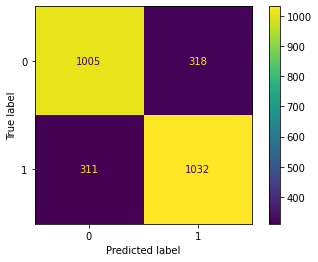

In [34]:
report(nb)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1323
           1       0.77      0.74      0.75      1343

    accuracy                           0.76      2666
   macro avg       0.76      0.76      0.76      2666
weighted avg       0.76      0.76      0.76      2666



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


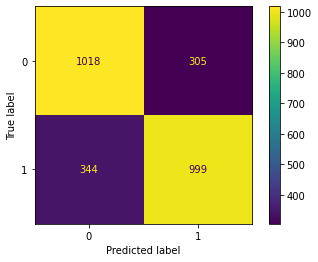

In [35]:
report(svc)

In [123]:
import joblib
joblib.dump(vectorizer, 'tfidf.pkl')
joblib.dump(svc, 'model.pkl')

In [37]:
model = joblib.load('model.pkl')
tfidf = joblib.load('tfidf.pkl')

In [38]:
data = ['worst movie could have taken nicely']
def text_processing(data):
  for sent in data:
    final_words = []
    text = sent.lower().split()
    for word in text:
      if word not in stopwords and word not in punct:
        lemmatized_text = re.sub(r'[0-9\.]+', '' ,lemma.lemmatize(word, pos='v'))
        final_words.append(lemmatized_text)
  return ' '.join(final_words)

In [39]:
final_review = text_processing(data)

In [40]:
review = pd.Series(final_review)

In [41]:
vector = tfidf.transform(review)

In [42]:
result = model.predict(vector)[0]

In [43]:
if result == 1:
  print('positive review')
else:
  print('negative review')

negative review


In [44]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaa',
 'aaliyah',
 'abagnale',
 'abandon',
 'abandone',
 'abandono',
 'abbass',
 'abbott',
 'abbreviate',
 'abc',
 'abderrahmane',
 'aberration',
 'abhor',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aborbing',
 'aboriginal',
 'aboul',
 'abound',
 'about',
 'above',
 'abrahams',
 'abrams',
 'abridge',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolutamente',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdities',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'aburrido',
 'abuse',
 'aby',
 'abysmal',
 'abysmally',
 'acaba',
 'acabamos',
 'academic',
 'academy',
 'accelerate',
 'accent',
 'accentuate',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'acclaim',
 'accomodates',
 'accompany',
 'accomplish',
 'accomplishment',
 'accomplishments',
 'accord',
 'accordio

In [88]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text
from tensorflow.keras.callbacks import EarlyStopping

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dense(512, activation='relu',)(outputs['pooled_output'])
a = tf.keras.layers.Dropout(0.1, name="dropout")(l)
l = tf.keras.layers.Dense(256, activation='relu',)(a)
a = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(128, activation='relu',)(a)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model


In [107]:
early_stop = EarlyStopping(verbose=1, patience=3)

In [109]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [110]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/10
267/267 [==============================] - 111s 408ms/step - loss: 0.6478 - accuracy: 0.6195 - val_loss: 0.5402 - val_accuracy: 0.7281
Epoch 2/10
267/267 [==============================] - 108s 405ms/step - loss: 0.5603 - accuracy: 0.7119 - val_loss: 0.4992 - val_accuracy: 0.7529
Epoch 3/10
267/267 [==============================] - 108s 405ms/step - loss: 0.5351 - accuracy: 0.7288 - val_loss: 0.5001 - val_accuracy: 0.7628
Epoch 4/10
267/267 [==============================] - 108s 405ms/step - loss: 0.5160 - accuracy: 0.7421 - val_loss: 0.4820 - val_accuracy: 0.7656
Epoch 5/10
267/267 [==============================] - 108s 404ms/step - loss: 0.4992 - accuracy: 0.7633 - val_loss: 0.5224 - val_accuracy: 0.7515
Epoch 6/10
267/267 [==============================] - 108s 405ms/step - loss: 0.4943 - accuracy: 0.7611 - val_loss: 0.4714 - val_accuracy: 0.7736
Epoch 7/10
267/267 [==============================] - 108s 404ms/step - loss: 0.4930 - accuracy: 0.7608 - val_loss: 0.5110 -

In [113]:
losses = pd.DataFrame(model.history.history)

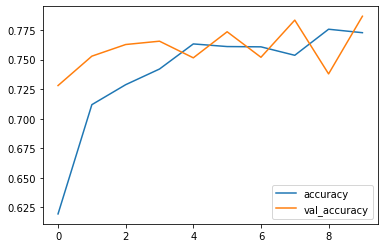

In [114]:
losses[['accuracy', 'val_accuracy']].plot()

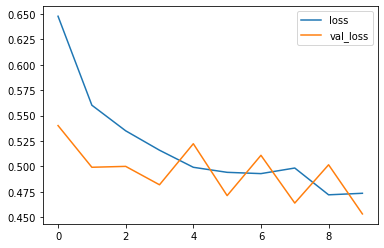

In [115]:
losses[['loss', 'val_loss']].plot()

In [116]:
y_pred = model.predict(X_test)

67/67 [==============================] - 23s 331ms/step


In [118]:
pred = np.where(y_pred >= 0.5, 1, 0)

In [119]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1053
           1       0.83      0.72      0.77      1080

    accuracy                           0.79      2133
   macro avg       0.79      0.79      0.79      2133
weighted avg       0.79      0.79      0.79      2133



In [122]:
confusion_matrix(y_test, pred)

array([[898, 155],
       [300, 780]])

In [164]:
# joblib.dump(model, r'/content/drive/MyDrive/final_model.h5')

In [163]:
model = joblib.load('model.h5')

In [152]:
data = ['Good acting by actor but the story is not up to the mark']
def text_processing(data):
  for sent in data:
    final_words = []
    text = sent.lower().split()
    for word in text:
      if word not in punct:
        lemmatized_text = re.sub(r'[0-9\.]+', '' , word)
        final_words.append(lemmatized_text)
  return ' '.join(final_words)

In [153]:
final_review = text_processing(data)

In [154]:
review = pd.Series(final_review)

In [155]:
result = model.predict(review)

1/1 [==============================] - 0s 27ms/step


In [156]:
result

array([[0.2184773]], dtype=float32)

In [157]:
if result[0][0] >= 0.5:
  print('positive review')
else:
  print('negative review')

negative review
